In [1]:
import numpy as np
import pandas as pd
from data import constants, datautil
from mathutil import comp, percentage, groupBy

In [2]:
df = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining\Results.xlsx")
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)
cr_bro = pd.read_excel(r"C:\Users\jenso\PowerFolders\Forschung\CSD Data Mining - Chromyl\Results.xlsx")
df = pd.concat([df, cr_bro])
# dataset = df.loc[((df["Type"] == "Norcorrole") & (df["Class"] != "Corrole")) | (df["Type"] == "Corrole")]# & (df["Class"] == "Corrole")]
dataset = df.loc[(df["Type"] != "Porphyrin")]
dataset.reset_index(drop=True, inplace=True)
dataset = percentage.createPercData(dataset)
dataset = comp.createCompData(dataset)
dataset = percentage.createCompPercData(dataset)
# dataset["dominant"] = dataset[constants.compColumns].idxmax(axis=1)
len(dataset)

c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\percentage.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + "%"] = df[col].abs()/sum
c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\comp.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col + " comp"] = __compValue(df[col+"1"], df[col + "2"])
c:\Users\jenso\Documents\Projects\porphystruct-scripts\mathutil\percentage.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

1336

In [3]:
from matplotlib import pyplot as plt
from plotutil.misc import cm_to_inch
import matplotlib
! pip install SciencePlots

In [4]:
plt.style.use(['science', 'nature', 'no-latex'])
plt.rcParams["figure.figsize"] = (cm_to_inch(16), cm_to_inch(13))
plt.rcParams["figure.dpi"] = 1200
plt.rcParams["axes.labelsize"] = 11
plt.rcParams["axes.titlesize"] = 9
plt.rcParams["xtick.labelsize"] = 9
plt.rcParams["ytick.labelsize"] = 9
plt.rcParams["font.family"] = "Arial"

In [5]:
! pip install plotnine
! pip install natsort
! pip install -U kaleido
! pip install plotly

import plotly.express as px
from natsort import index_natsorted
import plotly.express as px
from plotnine import *
import plotly.io as pio
import plotly
plotly.__version__ #5.6.0
import kaleido #required
kaleido.__version__ #0.2.1

'0.2.1'

In [6]:
from plotutil import scatter
from plotutil import periodictable

In [7]:
dataset.columns

Index(['Unnamed: 0', 'CCDC', 'Class', 'Ligand', 'Metal', 'Group',
       'AxialLigand', 'CoordNo', 'SubstNo', 'CoSolv', 'Id', 'Type', 'DoopExp',
       'DoopSim', 'Doming1', 'Saddling1', 'Ruffling1', 'WavingX1', 'WavingY1',
       'Propellering1', 'Doming2', 'Saddling2', 'Ruffling2', 'WavingX2',
       'WavingY2', 'Propellering2', 'Cavity', 'MetalToN4', 'MetalToMean',
       'Doming1%', 'Saddling1%', 'Ruffling1%', 'WavingX1%', 'WavingY1%',
       'Propellering1%', 'Doming2%', 'Saddling2%', 'Ruffling2%', 'WavingX2%',
       'WavingY2%', 'Propellering2%', 'Doming comp', 'Saddling comp',
       'Ruffling comp', 'WavingX comp', 'WavingY comp', 'Propellering comp',
       'Doming comp%', 'Saddling comp%', 'Ruffling comp%', 'WavingX comp%',
       'WavingY comp%', 'Propellering comp%'],
      dtype='object')

In [8]:
# dataset = datautil.applyAllSubclasses(dataset)
# dataset["Subclass"] = dataset.apply(lambda x:
#     "Kupfercorrole" if x["Subclass"] == "Übergangsmetallcorrole" and x["Metal"] == "Cu"
#     else x["Subclass"]
# ,axis=1)

C:\Users\jenso\AppData\Local\Temp/ipykernel_5968/2148180866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jenso\AppData\Local\Temp/ipykernel_5968/2148180866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\jenso\AppData\Local\Temp/ipykernel_5968/2148180866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

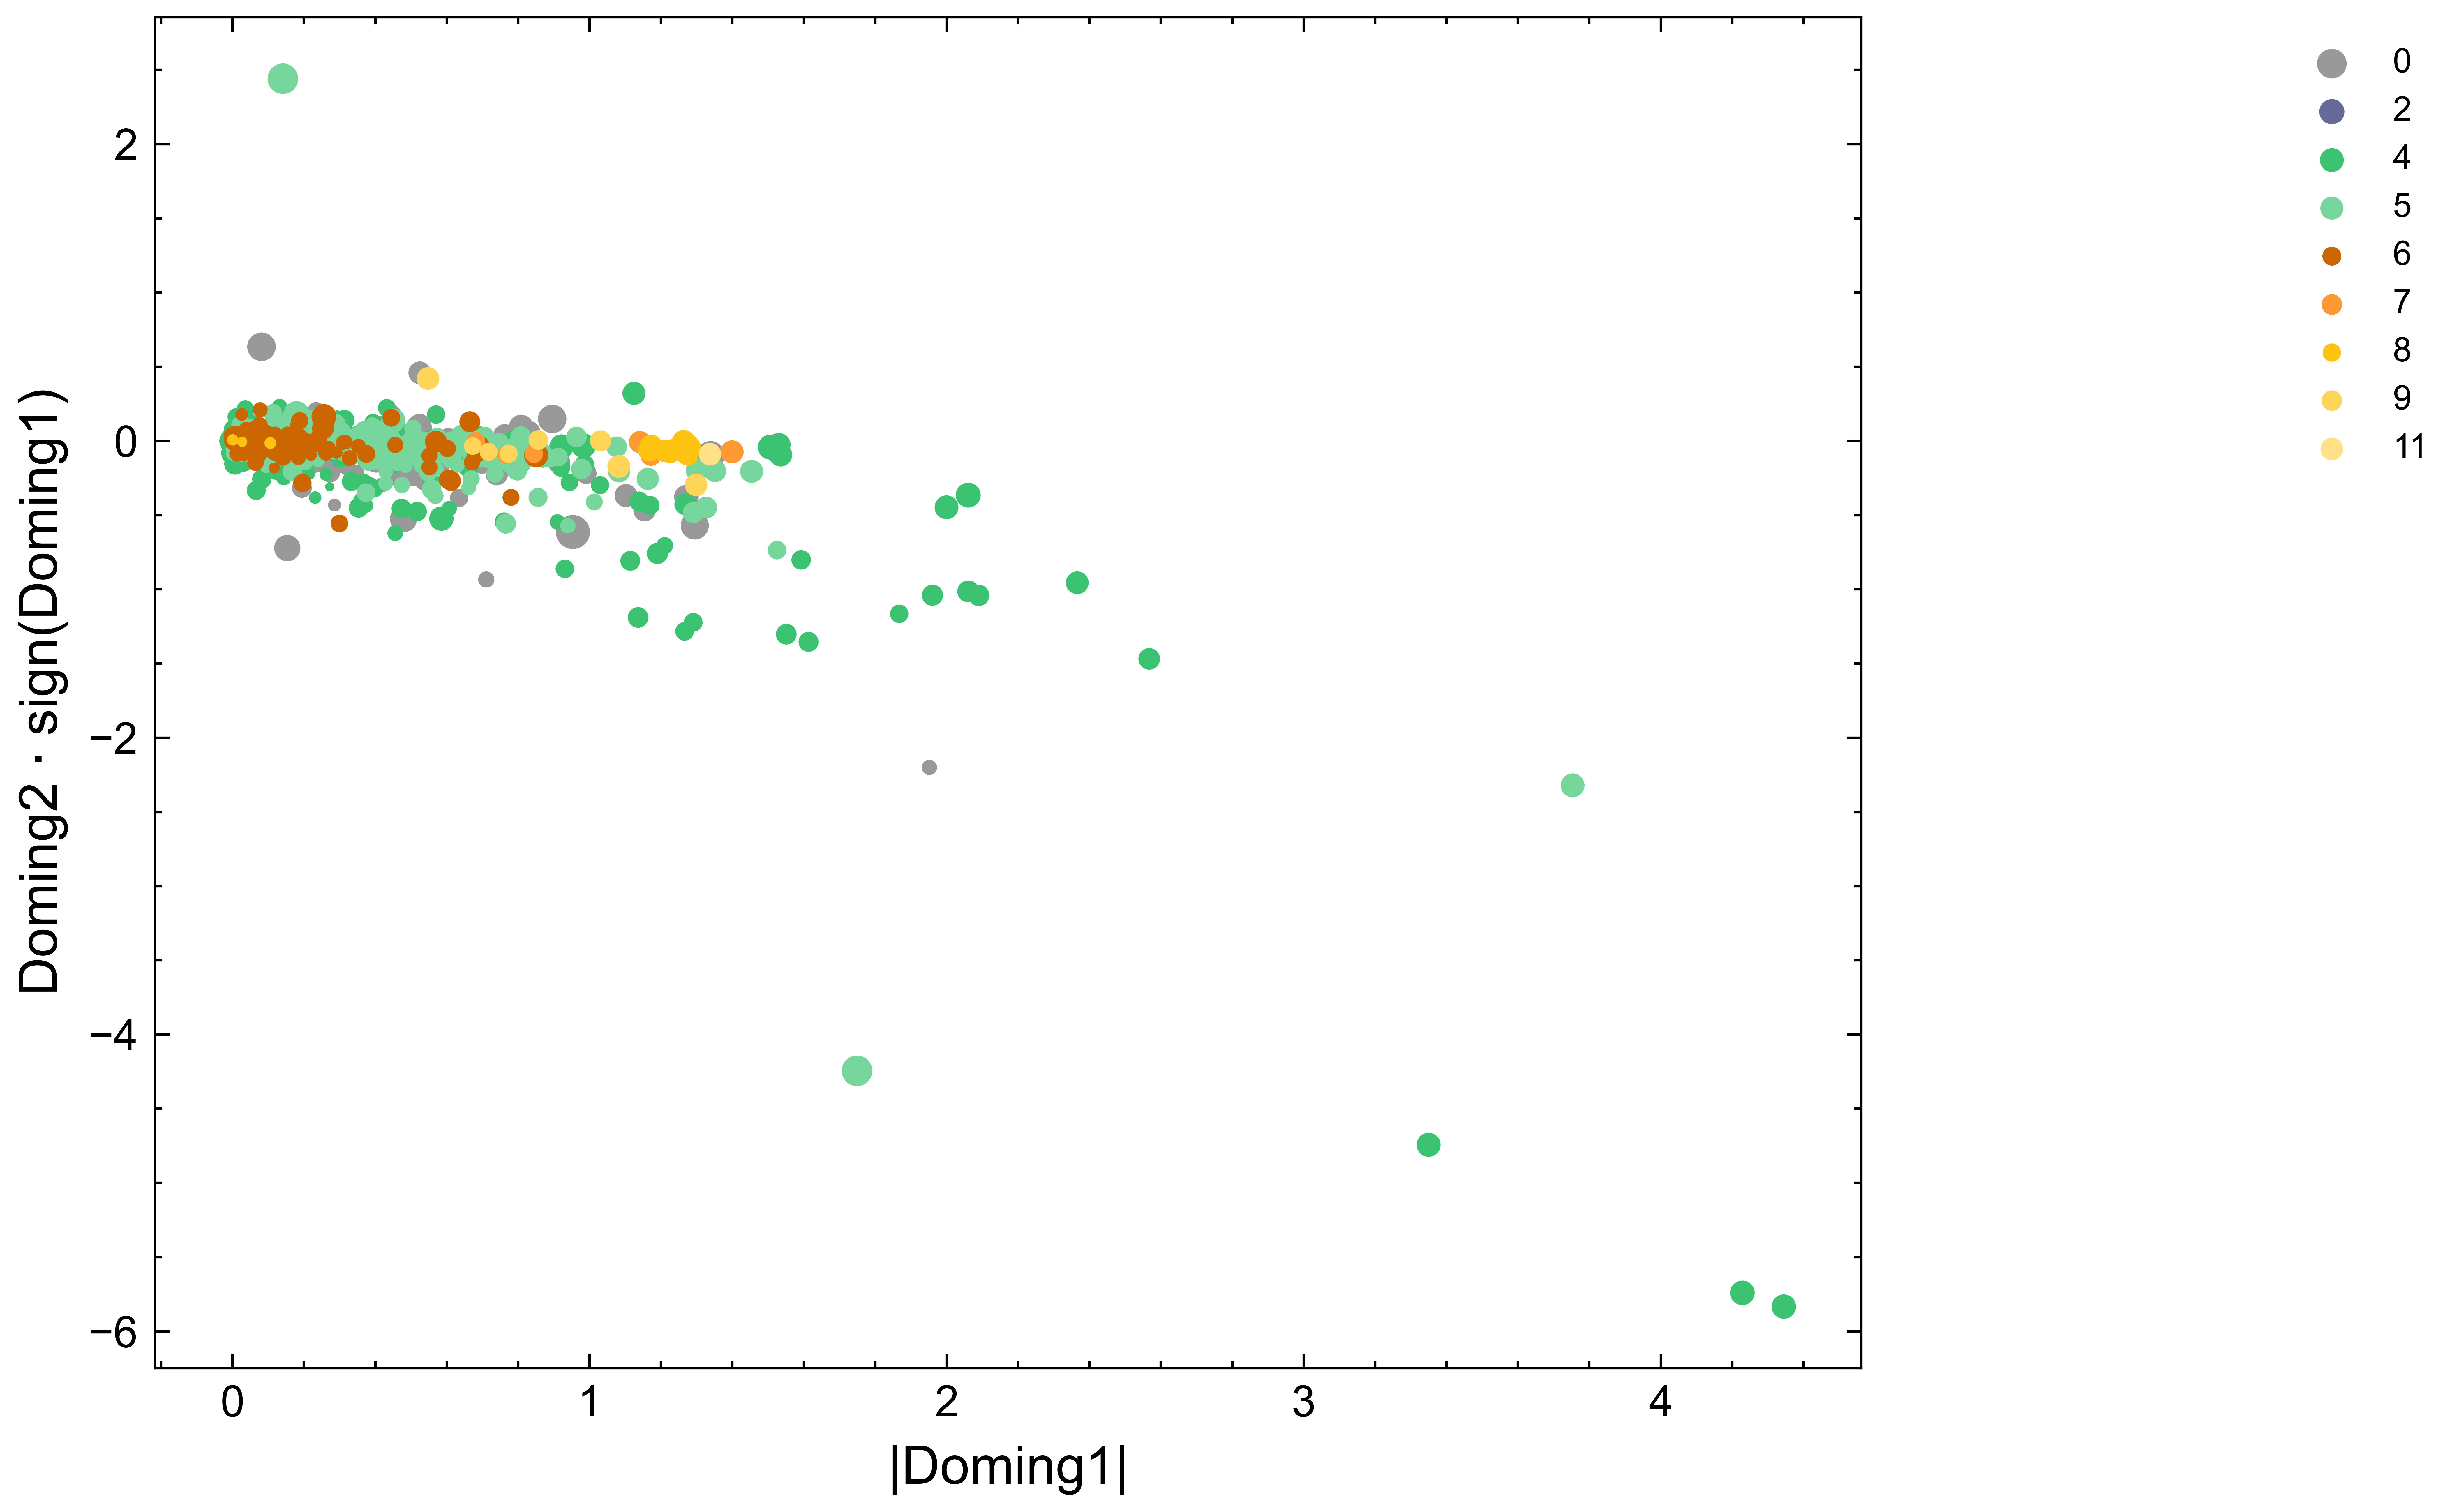

In [13]:
mode = "Doming"
dataset["x"] = np.abs(dataset[f"{mode}1"])
dataset["y"] = np.sign(dataset[f"{mode}1"]) * dataset[f"{mode}2"]
dataset["M2N4"] = np.abs(dataset["MetalToN4"])
m3d = periodictable.m3d.copy()
groups = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","Ln"]
subst = range(0,15)
subclasses = list(constants.colors_to_subgroup.keys())
# groups = ["Fe","Mn", "Tc", "Re", "Ru", "Os"]
fig,ax = scatter.plot(dataset, "x", "y", [0,1,2,3,4,5,6,7,8,9,10,11,12,13], "CoordNo", constants.colors_classes, 
x_label=f"|{mode}1|", y_label=f"{mode}2 $\cdot$ sign({mode}1)")
ax.legend(bbox_to_anchor=(1.35,1), loc=1)